In [13]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Correct path
DATASET_PATH = r"D:\\"

# Correct machine names
MACHINE_TYPES = ["fan", "pump", "gearbox"]
#print(MACHINE_TYPES)
X_train = []
X_test = []
y_test = []
# ================================
# Step 1: Load Train Data (Normal Only)
# ================================
for machine_type in MACHINE_TYPES:
    train_folder = os.path.join(DATASET_PATH, machine_type, "train")
    
    # Loop through all files in train folder
    for root, dirs, files in os.walk(train_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                
                # Load audio and extract MFCC features
                y, sr = librosa.load(file_path, sr=None)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                mfcc_scaled = np.mean(mfcc.T, axis=0)  # Average across time axis
                
                # Append to train data
                X_train.append(mfcc_scaled)

print("Finished loading TRAIN data!")

# ================================
# Step 2: Load Test Data (Normal + Anomaly)
# ================================
for machine_type in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        test_folder = os.path.join(DATASET_PATH, machine_type, test_type)
        
        for root, dirs, files in os.walk(test_folder):
            for file in files:
                if file.endswith(".wav"):
                    file_path = os.path.join(root, file)
                    
                    # Determine label from filename
                    if "anomaly" in file:
                        label = 1  # anomaly
                    else:
                        label = 0  # normal
                    
                    # Load audio and extract MFCC features
                    y, sr = librosa.load(file_path, sr=None)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                    mfcc_scaled = np.mean(mfcc.T, axis=0)
                    
                    # Append to test data
                    X_test.append(mfcc_scaled)
                    y_test.append(label)

print("Finished loading TEST data!")


# ================================
# Step 3: Convert lists to NumPy arrays
# ================================
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# ================================
# Step 4: Print dataset shapes
# ================================
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)


# Check training files loaded from each machine
for machine_type in MACHINE_TYPES:
    train_folder = os.path.join(DATASET_PATH, machine_type, "train")
    count = 0
    for root, dirs, files in os.walk(train_folder):
        count += len([file for file in files if file.endswith(".wav")])
    print(f"Train files for {machine_type}: {count}")

# Check testing files loaded from each machine
for machine_type in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        test_folder = os.path.join(DATASET_PATH, machine_type, test_type)
        count = 0
        for root, dirs, files in os.walk(test_folder):
            count += len([file for file in files if file.endswith(".wav")])
        print(f"Test files in {test_type} for {machine_type}: {count}")
print("\n")
print("----------------------------------")



from sklearn.model_selection import train_test_split

# Make sure X_test and y_test are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Now split into train and test for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_test, y_test, test_size=0.3, random_state=42, stratify=y_test
)

print("Train Shape for RF:", X_train_rf.shape)
print("Test Shape for RF:", X_test_rf.shape)






from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Updated Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=300,          # More trees
    max_depth=20,              # Limit depth
    min_samples_split=5,       # Minimum samples to split
    min_samples_leaf=2,        # Minimum samples in leaf
    max_features='sqrt',       # Best split
    random_state=42,
    n_jobs=-1                  # Use all cores
)

# Train
rf_model.fit(X_train_rf, y_train_rf)
print("Random Forest Training Completed!")

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))




Finished loading TRAIN data!
Finished loading TEST data!
Train Features Shape: (9044, 40)
Test Features Shape: (3807, 40)
Test Labels Shape: (3807,)
Train files for fan: 3009
Train files for pump: 3009
Train files for gearbox: 3026
Test files in source_test for fan: 600
Test files in target_test for fan: 600
Test files in source_test for pump: 600
Test files in target_test for pump: 600
Test files in source_test for gearbox: 762
Test files in target_test for gearbox: 645


----------------------------------
Train Shape for RF: (2664, 40)
Test Shape for RF: (1143, 40)
Random Forest Training Completed!

Confusion Matrix:
[[423 153]
 [199 368]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       576
           1       0.71      0.65      0.68       567

    accuracy                           0.69      1143
   macro avg       0.69      0.69      0.69      1143
weighted avg       0.69      0.69      0.69      1143


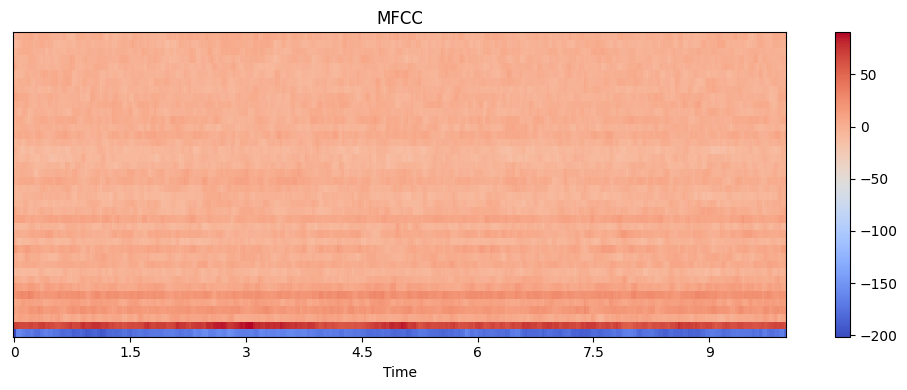

In [11]:
import librosa.display
import matplotlib.pyplot as plt

# Example: Load one file manually
file_path = r"D:\gearbox\train\section_00_source_train_normal_0000_0_g_25_mm_2000_mV_none.wav"  # <-- put correct path

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Extract MFCC (not mean pooled)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()



In [15]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Correct path
DATASET_PATH = r"D:\\" 

# Only focus on FAN for now
MACHINE_TYPE = "fan"

# Initialize lists
X_fan = []
y_fan = []

# ================================
# Step 1: Feature Extraction Function (New!)
# ================================
def extract_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))

    # Combine all features into one array
    combined_features = np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zero_crossing_rate, rms))
    
    return combined_features

# ================================
# Step 2: Load Fan Source/Target Test Data (Normal + Anomaly)
# ================================
for test_type in ["source_test", "target_test"]:
    test_folder = os.path.join(DATASET_PATH, MACHINE_TYPE, test_type)
    for root, dirs, files in os.walk(test_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                
                # Label
                if "anomaly" in file:
                    label = 1
                else:
                    label = 0
                
                # Load and extract features
                features = extract_features(file_path)
                
                X_fan.append(features)
                y_fan.append(label)

print(f"Finished loading and extracting features for {MACHINE_TYPE}!")
print("Total samples loaded:", len(X_fan))

# Convert to numpy arrays
X_fan = np.array(X_fan)
y_fan = np.array(y_fan)

print("Fan Features Shape:", X_fan.shape)  # Should be (samples, 44)
print("Fan Labels Shape:", y_fan.shape)

# ================================
# Step 3: Split Fan Data into Train/Test
# ================================
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(
    X_fan, y_fan, test_size=0.3, random_state=42, stratify=y_fan
)

print("Fan Train Shape:", X_train_fan.shape)
print("Fan Test Shape:", X_test_fan.shape)

# ================================
# Step 4: Train Random Forest (Tuned)
# ================================
rf_model_fan = RandomForestClassifier(
    n_estimators=500,          # More trees for better performance
    max_depth=25,              # Deeper trees
    min_samples_split=4,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model_fan.fit(X_train_fan, y_train_fan)
print("Random Forest Training Completed for FAN!")

# ================================
# Step 5: Evaluate
# ================================
y_pred_fan = rf_model_fan.predict(X_test_fan)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_fan, y_pred_fan))

print("\nClassification Report:")
print(classification_report(y_test_fan, y_pred_fan))


Finished loading and extracting features for fan!
Total samples loaded: 1200
Fan Features Shape: (1200, 44)
Fan Labels Shape: (1200,)
Fan Train Shape: (840, 44)
Fan Test Shape: (360, 44)
Random Forest Training Completed for FAN!

Confusion Matrix:
[[142  38]
 [ 41 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       180
           1       0.79      0.77      0.78       180

    accuracy                           0.78       360
   macro avg       0.78      0.78      0.78       360
weighted avg       0.78      0.78      0.78       360



In [16]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Correct path
DATASET_PATH = r"D:\\" 

# Only focus on FAN for now
MACHINE_TYPE = "fan"

# Initialize lists
X_fan = []
y_fan = []

# ================================
# Step 1: Feature Extraction Function (New!)
# ================================
def extract_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))

    # Combine all features into one array
    combined_features = np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zero_crossing_rate, rms))
    
    return combined_features

# ================================
# Step 2: Load Fan Source/Target Test Data (Normal + Anomaly)
# ================================
for test_type in ["source_test", "target_test"]:
    test_folder = os.path.join(DATASET_PATH, MACHINE_TYPE, test_type)
    for root, dirs, files in os.walk(test_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                
                # Label
                if "anomaly" in file:
                    label = 1
                else:
                    label = 0
                
                # Load and extract features
                features = extract_features(file_path)
                
                X_fan.append(features)
                y_fan.append(label)

print(f"Finished loading and extracting features for {MACHINE_TYPE}!")
print("Total samples loaded:", len(X_fan))

# Convert to numpy arrays
X_fan = np.array(X_fan)
y_fan = np.array(y_fan)

print("Fan Features Shape:", X_fan.shape)  # Should be (samples, 44)
print("Fan Labels Shape:", y_fan.shape)

# ================================
# Step 3: Split Fan Data into Train/Test
# ================================
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_fan_scaled = scaler.fit_transform(X_fan)

# Split on scaled features
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(
    X_fan_scaled, y_fan, test_size=0.3, random_state=42, stratify=y_fan
)



print("Fan Train Shape:", X_train_fan.shape)
print("Fan Test Shape:", X_test_fan.shape)

# ================================
# Step 4: Train Random Forest (Tuned)
# ================================
rf_model_fan = RandomForestClassifier(
    n_estimators=1000,         # 1000 trees
    max_depth=30,              # Slightly deeper
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model_fan.fit(X_train_fan, y_train_fan)
print("Random Forest Training Completed for FAN!")

# ================================
# Step 5: Evaluate
# ================================
y_pred_fan = rf_model_fan.predict(X_test_fan)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_fan, y_pred_fan))

print("\nClassification Report:")
print(classification_report(y_test_fan, y_pred_fan))


Finished loading and extracting features for fan!
Total samples loaded: 1200
Fan Features Shape: (1200, 44)
Fan Labels Shape: (1200,)
Fan Train Shape: (840, 44)
Fan Test Shape: (360, 44)
Random Forest Training Completed for FAN!

Confusion Matrix:
[[142  38]
 [ 38 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       180
           1       0.79      0.79      0.79       180

    accuracy                           0.79       360
   macro avg       0.79      0.79      0.79       360
weighted avg       0.79      0.79      0.79       360



In [19]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ======================
# 1. SUPERCHARGED FEATURE EXTRACTION
# ======================
def extract_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=22050)  # Fixed sample rate
    
    # Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    
    # MFCCs
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    
    # Chroma Features
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    
    # Spectral Features
    spectral_contrast = librosa.feature.spectral_contrast(S=log_S, sr=sr)
    
    # Temporal Features
    zcr = librosa.feature.zero_crossing_rate(y)
    rmse = librosa.feature.rms(y=y)
    
    # Feature Aggregation
    features = np.concatenate([
        np.mean(mfcc, axis=1),
        np.std(mfcc, axis=1),
        np.mean(mfcc_delta, axis=1),
        np.mean(chroma, axis=1),
        np.mean(spectral_contrast, axis=1),
        np.mean(zcr),
        np.mean(rmse),
        [librosa.feature.spectral_centroid(y=y)[0].mean()],
        [librosa.feature.spectral_bandwidth(y=y)[0].mean()],
        [librosa.feature.spectral_rolloff(y=y)[0].mean()]
    ])
    
    return features

# ======================
# 2. DATA LOADING WITH BALANCE CHECK
# ======================
DATASET_PATH = r"D:\\"
MACHINE_TYPE = "fan"

X = []
y = []

for test_type in ["source_test", "target_test"]:
    test_folder = os.path.join(DATASET_PATH, MACHINE_TYPE, test_type)
    for root, dirs, files in os.walk(test_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                label = 1 if "anomaly" in file else 0
                
                try:
                    features = extract_features(file_path)
                    X.append(features)
                    y.append(label)
                except Exception as e:
                    print(f"Skipped {file_path}: {str(e)}")

X = np.array(X)
y = np.array(y)

print(f"\nClass balance: Normal {sum(y==0)} | Anomaly {sum(y==1)}")

# ======================
# 3. DATA PREPROCESSING
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ======================
# 4. OPTIMIZED XGBOOST MODEL
# ======================
model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5,
    gamma=0.1,
    min_child_weight=3,
    objective='binary:logistic',
    eval_metric=['logloss', 'error'],
    early_stopping_rounds=20,
    random_state=42,
    tree_method='hist'
)

# Train with validation set
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# ======================
# 5. EVALUATION & VISUALIZATION
# ======================
# Plot training progress
results = model.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['error'], label='Train Error')
plt.plot(results['validation_1']['error'], label='Test Error')
plt.legend()
plt.title('Model Training Progress')
plt.ylabel('Error Rate')
plt.xlabel('Boosting Rounds')
plt.show()

# Final evaluation
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(12, 8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(range(len(sorted_idx[-20:])), model.feature_importances_[sorted_idx][-20:])
plt.yticks(range(len(sorted_idx[-20:])), [f"Feature {i}" for i in sorted_idx[-20:]])
plt.xlabel("Feature Importance")
plt.show()

Skipped D:\\fan\source_test\section_00_source_test_anomaly_0000.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 5 has 0 dimension(s)
Skipped D:\\fan\source_test\section_00_source_test_anomaly_0001.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 5 has 0 dimension(s)
Skipped D:\\fan\source_test\section_00_source_test_anomaly_0002.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 5 has 0 dimension(s)
Skipped D:\\fan\source_test\section_00_source_test_anomaly_0003.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 5 has 0 dimension(s)
Skipped D:\\fan\source_test\section_00_source_test_anomaly_0004.wav: all the input arrays must have same number of dimensions, but the array

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Correct path
DATASET_PATH = r"D:\\" 

# Machine type
MACHINE_TYPE = "pump"

# Initialize lists
X_pump = []
y_pump = []

# ================================
# Step 1: Advanced Feature Extraction Function
# ================================
def extract_advanced_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Zero Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))

    # Chroma STFT (New Added Feature)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    
    # Combine all features
    combined_features = np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zero_crossing_rate, rms, chroma_stft))
    
    return combined_features

# ================================
# Step 2: Load Pump Data (Source/Target Test, Normal + Anomaly)
# ================================
for test_type in ["source_test", "target_test"]:
    test_folder = os.path.join(DATASET_PATH, MACHINE_TYPE, test_type)
    for root, dirs, files in os.walk(test_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                
                # Label
                label = 1 if "anomaly" in file else 0
                
                # Extract features
                features = extract_advanced_features(file_path)
                
                X_pump.append(features)
                y_pump.append(label)

print(f"Finished loading and extracting advanced features for {MACHINE_TYPE}!")
print("Total samples loaded:", len(X_pump))

# Convert to numpy arrays
X_pump = np.array(X_pump)
y_pump = np.array(y_pump)

print("Pump Features Shape:", X_pump.shape)
print("Pump Labels Shape:", y_pump.shape)

# ================================
# Step 3: Normalize Features
# ================================
scaler = StandardScaler()
X_pump_scaled = scaler.fit_transform(X_pump)

# ================================
# Step 4: Split Data
# ================================
X_train_pump, X_test_pump, y_train_pump, y_test_pump = train_test_split(
    X_pump_scaled, y_pump, test_size=0.3, random_state=42, stratify=y_pump
)

print("Pump Train Shape:", X_train_pump.shape)
print("Pump Test Shape:", X_test_pump.shape)

# ================================
# Step 5: Train Gradient Boosting Classifier (Better than Random Forest here)
# ================================
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# FINAL Gradient Boosting for Pump (Super Tuned!)
gbm_model_final = GradientBoostingClassifier(
    n_estimators=700,          # More boosting rounds (was 500)
    learning_rate=0.04,        # Smaller step size (was 0.05)
    max_depth=6,               # Slightly deeper trees (was 5)
    random_state=42
)

# Train
gbm_model_final.fit(X_train_pump, y_train_pump)
print("Final Gradient Boosting Training Completed for PUMP!")

# Predict
y_pred_pump_final = gbm_model_final.predict(X_test_pump)

# Evaluate
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test_pump, y_pred_pump_final))

print("\nFinal Classification Report:")
print(classification_report(y_test_pump, y_pred_pump_final))


Finished loading and extracting advanced features for pump!
Total samples loaded: 1200
Pump Features Shape: (1200, 45)
Pump Labels Shape: (1200,)
Pump Train Shape: (840, 45)
Pump Test Shape: (360, 45)
Final Gradient Boosting Training Completed for PUMP!

Final Confusion Matrix:
[[142  38]
 [ 51 129]]

Final Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       180
           1       0.77      0.72      0.74       180

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360

